Prajapati_M & K-State Honor Code: "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [9]:
df = pd.read_csv("data/movie_metadata.csv")
print df.head()

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0 

In [10]:
df = df.fillna('0')
df1=df
df

color       director_name num_critic_for_reviews duration  \
0                Color       James Cameron                    723      178   
1                Color      Gore Verbinski                    302      169   
2                Color          Sam Mendes                    602      148   
3                Color   Christopher Nolan                    813      164   
4                    0         Doug Walker                      0        0   
5                Color      Andrew Stanton                    462      132   
6                Color           Sam Raimi                    392      156   
7                Color        Nathan Greno                    324      100   
8                Color         Joss Whedon                    635      141   
9                Color         David Yates                    375      153   
10               Color         Zack Snyder                    673      183   
11               Color        Bryan Singer                    434      169   
12               Color        Marc Forster                    403      106   
13               Color      Gore Verbinski                    313      151   
14               Color      Gore Verbinski                    450      150   
15               Color         Zack Snyder                    733      143   
16               Color      Andrew Adamson                    258      150   
17               Color         Joss Whedon                    703      173   
18               Color        Rob Marshall                    448      136   
19               Color    Barry Sonnenfeld                    451      106   
20               Color       Peter Jackson                    422      164   
21               Color           Marc Webb                    599      153   
22               Color        Ridley Scott                    343      156   
23               Color       Peter Jackson                    509      186   
24               Color         Chris Weitz                    251      113   
25               Color       Peter Jackson                    446      201   
26               Color       James Cameron                    315      194   
27               Color       Anthony Russo                    516      147   
28               Color          Peter Berg                    377      131   
29               Color     Colin Trevorrow                    644      124   
...                ...                 ...                    ...      ...   
5013             Color          Eric Eason                     28       79   
5014             Color            Uwe Boll                     58       80   
5015   Black and White   Richard Linklater                     61      100   
5016             Color     Joseph Mazzella                      0       90   
5017             Color        Travis Legge                      1       90   
5018             Color       Alex Kendrick                      5      120   
5019             Color       Marcus Nispel                     43       91   
5020                 0     Brandon Landers                      0      143   
5021             Color         Jay Duplass                     51       85   
5022   Black and White          Jim Chuchu                      6       60   
5023             Color          Daryl Wein                     22       88   
5024             Color         Jason Trost                     42       78   
5025             Color         John Waters                     73      108   
5026             Color     Olivier Assayas                     81      110   
5027             Color        Jafar Panahi                     64       90   
5028   Black and White       Ivan Kavanagh                     12       83   
5029             Color    Kiyoshi Kurosawa                     78      111   
5030             Color        Tadeo Garcia                      0       84   
5031             Color  Thomas L. Phillips                     13       82   
5032             Color     Ash Baron-Co

In [11]:
# basic statistics
df.describe()

num_voted_users  cast_total_facebook_likes   imdb_score  \
count     5.043000e+03                5043.000000  5043.000000   
mean      8.366816e+04                9699.063851     6.442138   
std       1.384853e+05               18163.799124     1.125116   
min       5.000000e+00                   0.000000     1.600000   
25%       8.593500e+03                1411.000000     5.800000   
50%       3.435900e+04                3090.000000     6.600000   
75%       9.630900e+04               13756.500000     7.200000   
max       1.689764e+06              656730.000000     9.500000   

       movie_facebook_likes  
count           5043.000000  
mean            7525.964505  
std            19320.445110  
min                0.000000  
25%                0.000000  
50%              166.000000  
75%             3000.000000  
max           349000.000000

In [12]:
# correlation analysis
df.corr()

num_voted_users  cast_total_facebook_likes  \
num_voted_users                   1.000000                   0.265911   
cast_total_facebook_likes         0.265911                   1.000000   
imdb_score                        0.410965                   0.085787   
movie_facebook_likes              0.537924                   0.209786   

                           imdb_score  movie_facebook_likes  
num_voted_users              0.410965              0.537924  
cast_total_facebook_likes    0.085787              0.209786  
imdb_score                   1.000000              0.247049  
movie_facebook_likes         0.247049              1.000000

In [13]:
corr = pd.DataFrame(df.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

imdb_score
num_voted_users              0.410965
movie_facebook_likes         0.247049
cast_total_facebook_likes    0.085787

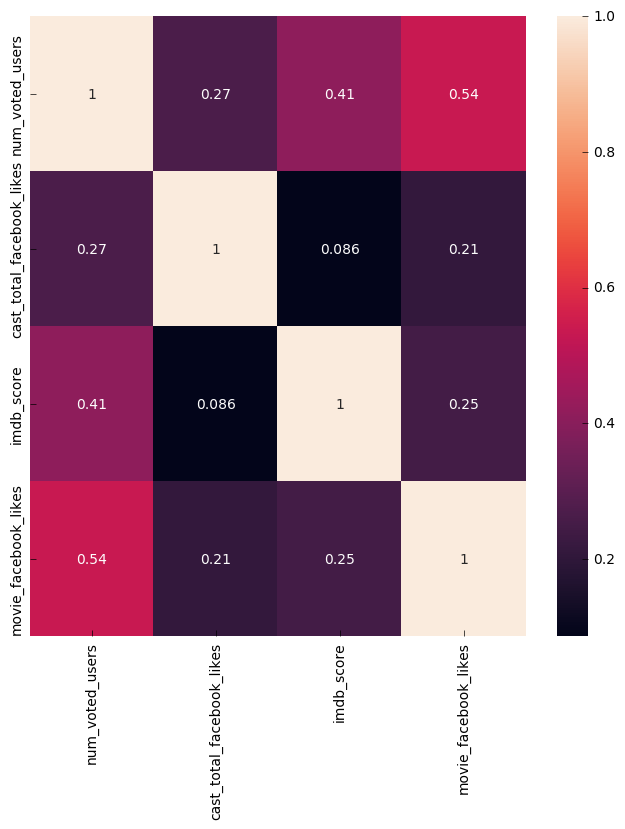

In [14]:
# heatmap for correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

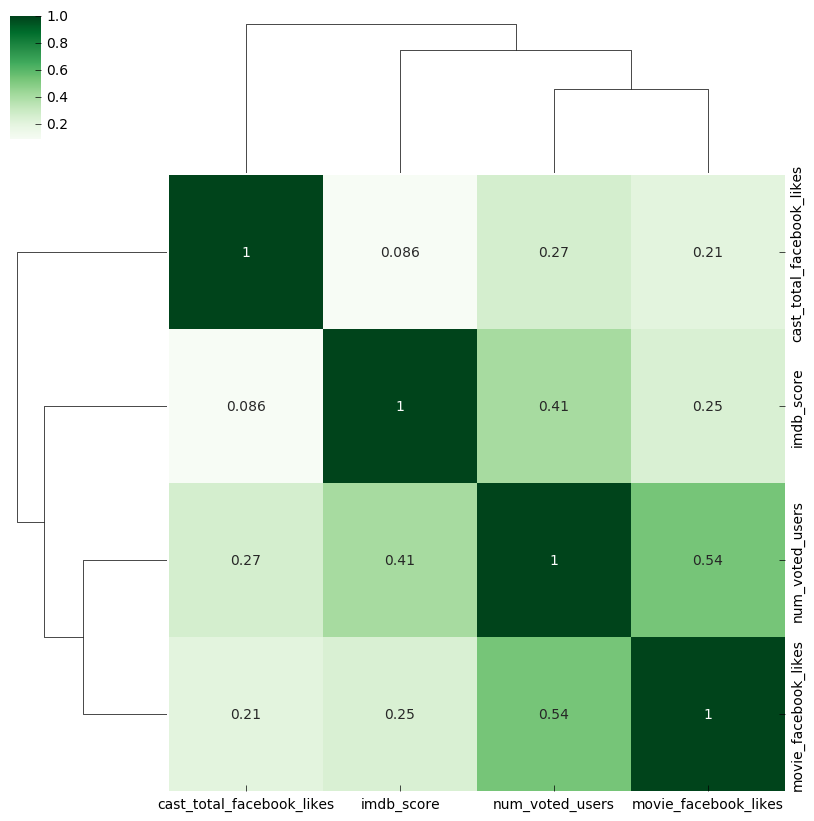

In [15]:
# cluster map 
sns.clustermap(data=df.corr(), annot=True, cmap='Greens')

#Decision tree to create category

In [196]:
df1=pd.qcut(df['imdb_score'], 4, labels=False)
df['benning']=df1
df

color       director_name num_critic_for_reviews duration  \
0                Color       James Cameron                    723      178   
1                Color      Gore Verbinski                    302      169   
2                Color          Sam Mendes                    602      148   
3                Color   Christopher Nolan                    813      164   
4                    0         Doug Walker                      0        0   
5                Color      Andrew Stanton                    462      132   
6                Color           Sam Raimi                    392      156   
7                Color        Nathan Greno                    324      100   
8                Color         Joss Whedon                    635      141   
9                Color         David Yates                    375      153   
10               Color         Zack Snyder                    673      183   
11               Color        Bryan Singer                    434      169   
12               Color        Marc Forster                    403      106   
13               Color      Gore Verbinski                    313      151   
14               Color      Gore Verbinski                    450      150   
15               Color         Zack Snyder                    733      143   
16               Color      Andrew Adamson                    258      150   
17               Color         Joss Whedon                    703      173   
18               Color        Rob Marshall                    448      136   
19               Color    Barry Sonnenfeld                    451      106   
20               Color       Peter Jackson                    422      164   
21               Color           Marc Webb                    599      153   
22               Color        Ridley Scott                    343      156   
23               Color       Peter Jackson                    509      186   
24               Color         Chris Weitz                    251      113   
25               Color       Peter Jackson                    446      201   
26               Color       James Cameron                    315      194   
27               Color       Anthony Russo                    516      147   
28               Color          Peter Berg                    377      131   
29               Color     Colin Trevorrow                    644      124   
...                ...                 ...                    ...      ...   
5013             Color          Eric Eason                     28       79   
5014             Color            Uwe Boll                     58       80   
5015   Black and White   Richard Linklater                     61      100   
5016             Color     Joseph Mazzella                      0       90   
5017             Color        Travis Legge                      1       90   
5018             Color       Alex Kendrick                      5      120   
5019             Color       Marcus Nispel                     43       91   
5020                 0     Brandon Landers                      0      143   
5021             Color         Jay Duplass                     51       85   
5022   Black and White          Jim Chuchu                      6       60   
5023             Color          Daryl Wein                     22       88   
5024             Color         Jason Trost                     42       78   
5025             Color         John Waters                     73      108   
5026             Color     Olivier Assayas                     81      110   
5027             Color        Jafar Panahi                     64       90   
5028   Black and White       Ivan Kavanagh                     12       83   
5029             Color    Kiyoshi Kurosawa                     78      111   
5030             Color        Tadeo Garcia                      0       84   
5031             Color  Thomas L. Phillips                     13       82   
5032             Color     Ash Baron-Co

In [218]:
# declare X variables and y variable
y = df['imdb_score'].astype(int)
X = df.drop(['color','country','actor_3_name','movie_imdb_link','director_name','plot_keywords','actor_1_name','movie_title','actor_2_name','imdb_score','genres','title_year','language','content_rating','num_voted_users'], axis=1)

In [249]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize DecisionTreeClassifier()
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)
# Train a decision tree model
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [254]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html

print metrics.accuracy_score(y_test, clf.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, clf.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, clf.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, clf.predict(X_test))

0.6206212822207535
--------------------------------------------------------
[[  0   0   0   0   0   0   0   0   0]
 [  0   1   1   4   7   0   0   0   0]
 [  0   0   5  12  20   0   0   0   0]
 [  2   1   7  25  57   0   0   0   0]
 [  1   5  27  60 174  28   0   0   0]
 [  0   0   0   0  46 400  87   0   0]
 [  0   0   0   0   0  83 287  63   3]
 [  0   0   0   0   0   0  58  46   0]
 [  0   0   0   0   0   0   2   0   1]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.14      0.08      0.10        13
           3       0.12      0.14      0.13        37
           4       0.25      0.27      0.26        92
           5       0.57      0.59      0.58       295
           6       0.78      0.75      0.77       533
           7       0.66      0.66      0.66       436
           8       0.42      0.44      0.43       104
           9       0.25     

C:\Users\Maitri_P\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Maitri_P\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Maitri_P\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ValueError: multiclass format is not supported

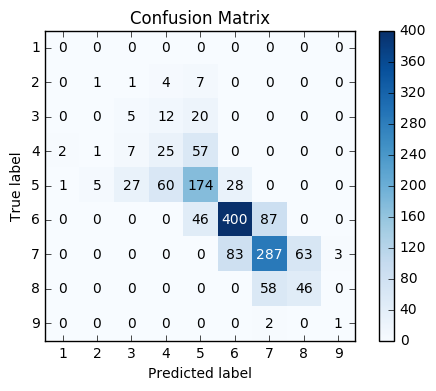

In [261]:

import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=clf.predict(X_test))
plt.show()

In [269]:
tree.export_graphviz(clf, out_file='data/decisiontree.dot', feature_names=X.columns)

In [270]:
from IPython.display import Image
Image("data/decisiontree.png")

K-nearest Neighbors (knn)

In [274]:
df1=pd.qcut(df['imdb_score'], 4, labels=False)
df['benning']=df1
df
df2=df
df2

color       director_name num_critic_for_reviews duration  \
0                Color       James Cameron                    723      178   
1                Color      Gore Verbinski                    302      169   
2                Color          Sam Mendes                    602      148   
3                Color   Christopher Nolan                    813      164   
4                    0         Doug Walker                      0        0   
5                Color      Andrew Stanton                    462      132   
6                Color           Sam Raimi                    392      156   
7                Color        Nathan Greno                    324      100   
8                Color         Joss Whedon                    635      141   
9                Color         David Yates                    375      153   
10               Color         Zack Snyder                    673      183   
11               Color        Bryan Singer                    434      169   
12               Color        Marc Forster                    403      106   
13               Color      Gore Verbinski                    313      151   
14               Color      Gore Verbinski                    450      150   
15               Color         Zack Snyder                    733      143   
16               Color      Andrew Adamson                    258      150   
17               Color         Joss Whedon                    703      173   
18               Color        Rob Marshall                    448      136   
19               Color    Barry Sonnenfeld                    451      106   
20               Color       Peter Jackson                    422      164   
21               Color           Marc Webb                    599      153   
22               Color        Ridley Scott                    343      156   
23               Color       Peter Jackson                    509      186   
24               Color         Chris Weitz                    251      113   
25               Color       Peter Jackson                    446      201   
26               Color       James Cameron                    315      194   
27               Color       Anthony Russo                    516      147   
28               Color          Peter Berg                    377      131   
29               Color     Colin Trevorrow                    644      124   
...                ...                 ...                    ...      ...   
5013             Color          Eric Eason                     28       79   
5014             Color            Uwe Boll                     58       80   
5015   Black and White   Richard Linklater                     61      100   
5016             Color     Joseph Mazzella                      0       90   
5017             Color        Travis Legge                      1       90   
5018             Color       Alex Kendrick                      5      120   
5019             Color       Marcus Nispel                     43       91   
5020                 0     Brandon Landers                      0      143   
5021             Color         Jay Duplass                     51       85   
5022   Black and White          Jim Chuchu                      6       60   
5023             Color          Daryl Wein                     22       88   
5024             Color         Jason Trost                     42       78   
5025             Color         John Waters                     73      108   
5026             Color     Olivier Assayas                     81      110   
5027             Color        Jafar Panahi                     64       90   
5028   Black and White       Ivan Kavanagh                     12       83   
5029             Color    Kiyoshi Kurosawa                     78      111   
5030             Color        Tadeo Garcia                      0       84   
5031             Color  Thomas L. Phillips                     13       82   
5032             Color     Ash Baron-Co

In [275]:
# declare X variables and y variable
y = df2['imdb_score'].astype(int)
X = df2.drop(['color','country','actor_3_name','movie_imdb_link','director_name','plot_keywords','actor_1_name','movie_title','actor_2_name','imdb_score','genres','title_year','language','content_rating','num_voted_users'], axis=1)

In [278]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn= KNeighborsClassifier()
knn.fit(X,y)
# initialize KNeighborsClassifier() and train a KNN Model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Appendix 1: 10 fold cross validation

In [279]:
# evaluate the knn model using 10-fold cross-validation
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

C:\Users\Maitri_P\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[0.32480315 0.29585799 0.256917   0.19762846 0.19762846 0.19444444
 0.1752988  0.18326693 0.23505976 0.272     ]
0.23329049932678708


Appendix 2: Search for the optimal k value (GridSearch)

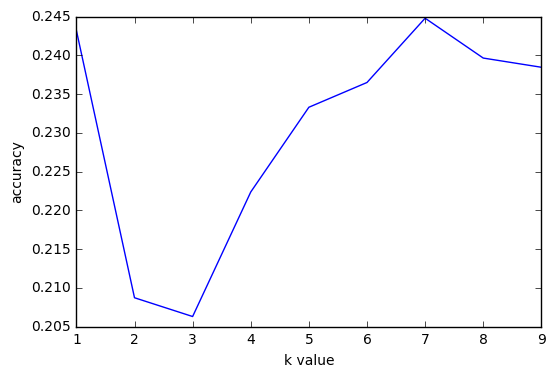

In [280]:
# search for an optimal value of K
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, y, cv=10, scoring='accuracy')))

# plot the K values (x-axis) versus the 10-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('accuracy')

In [282]:
#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

C:\Users\Maitri_P\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


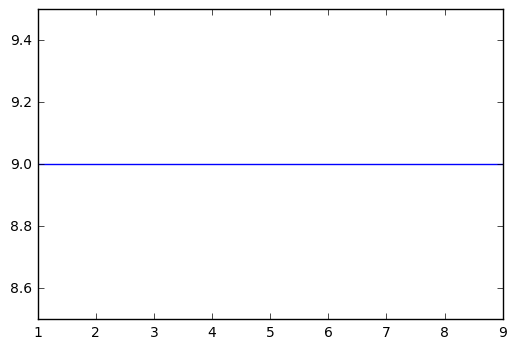

In [296]:

knn = KNeighborsClassifier()
k_range = range(1, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

# check the results of the grid search
for k in k_range:
   param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid_mean_scores = [k for result in k_range]
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.show()

In [298]:
# develop a new knn model with k = 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [299]:
#Model evaluation without valdation
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))
print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.29411764705882354
[[  0   0   0   0   0   0   0   0   0]
 [  0   0   0   3   4   6   0   0   0]
 [  0   1   3   5   8  13   6   1   0]
 [  0   0   4  14  24  34  16   0   0]
 [  0   3  14  36  94  89  56   3   0]
 [  2  10  15  68 124 205 105   4   0]
 [  2   4  13  43  86 150 123  15   0]
 [  0   0   2   7  22  41  26   6   0]
 [  0   0   0   0   1   1   0   1   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00        13
           3       0.06      0.08      0.07        37
           4       0.08      0.15      0.10        92
           5       0.26      0.32      0.29       295
           6       0.38      0.38      0.38       533
           7       0.37      0.28      0.32       436
           8       0.20      0.06      0.09       104
           9       0.00      0.00      0.00         3

   micro avg       0.29      0.29      0.29      1513
   macro avg       0.15      0.1

C:\Users\Maitri_P\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maitri_P\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Maitri_P\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maitri_P\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Maitri_P\An

ValueError: multiclass format is not supported

Appendix 3: Model Evaluation with ROC

In [317]:
# Generate ROC chart 
y = df2['imdb_score'].astype(int)
X = df2.drop(['color','country','actor_3_name','movie_imdb_link','director_name','plot_keywords','actor_1_name','movie_title','actor_2_name','imdb_score','genres','title_year','language','content_rating','num_voted_users'], axis=1)
df3=X
# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#This is ROC chart based on the testing dataset

fpr, tpr, thresholds = metrics.roc_curve(y_test,knn.predict(X_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print "False-positive rate:", fpr
print "True-positive rate: ", tpr
print "AUC score: ", metrics.roc_auc_score(y_test, knn.predict(X_test))

KeyError: "labels ['num_voted_users'] not contained in axis"

Handling Categorial Columns (or Variables) - One Hot Coding

In [320]:
df2=df
df3= df2.drop(['color','country','actor_3_name','movie_imdb_link','director_name','plot_keywords','actor_1_name','movie_title','actor_2_name','genres','title_year','language','content_rating','num_voted_users'], axis=1)


df3['imdb_score'] = df3['imdb_score'].astype(int)
print df3.dtypes

num_critic_for_reviews       object
duration                     object
director_facebook_likes      object
actor_3_facebook_likes       object
actor_1_facebook_likes       object
gross                        object
cast_total_facebook_likes     int64
facenumber_in_poster         object
num_user_for_reviews         object
budget                       object
actor_2_facebook_likes       object
imdb_score                    int32
aspect_ratio                 object
movie_facebook_likes          int64
benning                       int64
dtype: object


In [321]:
df3.head(2)

num_critic_for_reviews duration director_facebook_likes  \
0                    723      178                       0   
1                    302      169                     563   

  actor_3_facebook_likes actor_1_facebook_likes        gross  \
0                    855                   1000  7.60506e+08   
1                   1000                  40000  3.09404e+08   

   cast_total_facebook_likes facenumber_in_poster num_user_for_reviews  \
0                       4834                    0                 3054   
1                      48350                    0                 1238   

     budget actor_2_facebook_likes  imdb_score aspect_ratio  \
0  2.37e+08                    936           7         1.78   
1     3e+08                   5000           7         2.35   

   movie_facebook_likes  benning  
0                 33000        3  
1                     0        2

In [323]:
df3 = pd.get_dummies(df3, columns=["num_critic_for_reviews","cast_total_facebook_likes", "movie_facebook_likes","benning"], prefix=["num_critic_for_reviews", "cast_total_facebook_likes","movie_facebook_likes", "benning"])
df3.head()

duration director_facebook_likes actor_3_facebook_likes  \
0      178                       0                    855   
1      169                     563                   1000   
2      148                       0                    161   
3      164                   22000                  23000   
4        0                     131                      0   

  actor_1_facebook_likes        gross facenumber_in_poster  \
0                   1000  7.60506e+08                    0   
1                  40000  3.09404e+08                    0   
2                  11000  2.00074e+08                    1   
3                  27000  4.48131e+08                    0   
4                    131            0                    0   

  num_user_for_reviews    budget actor_2_facebook_likes  imdb_score  \
0                 3054  2.37e+08                    936           7   
1                 1238     3e+08                   5000           7   
2                  994  2.45e+08                    393           6   
3                 2701   2.5e+08                  23000           8   
4                    0         0                     12           7   

     ...     movie_facebook_likes_175000  movie_facebook_likes_190000  \
0    ...                               0                            0   
1    ...                               0                            0   
2    ...                               0                            0   
3    ...                               0                            0   
4    ...                               0                            0   

   movie_facebook_likes_191000  movie_facebook_likes_197000  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   movie_facebook_likes_199000  movie_facebook_likes_349000  benning_0  \
0                            0                            0          0   
1                            0                            0          0   
2                            0                            0          0   
3                            0                            0          0   
4                            0                            0          0   

   benning_1  benning_2  benning_3  
0          0          0          1  
1          0          1          0  
2          0          1          0  
3          0          0          1  
4          0          1          0  

[5 rows x 5398 columns]

In [324]:
#declare X variables and y variable
y = df3['imdb_score']
X = df3.drop(['imdb_score', 'benning_0', 'movie_facebook_likes_175000', 'movie_facebook_likes_191000', 'movie_facebook_likes_199000'], axis=1)

In [330]:

X.head(2)

duration director_facebook_likes actor_3_facebook_likes  \
0      178                       0                    855   
1      169                     563                   1000   

  actor_1_facebook_likes        gross facenumber_in_poster  \
0                   1000  7.60506e+08                    0   
1                  40000  3.09404e+08                    0   

  num_user_for_reviews    budget actor_2_facebook_likes aspect_ratio  \
0                 3054  2.37e+08                    936         1.78   
1                 1238     3e+08                   5000         2.35   

     ...      movie_facebook_likes_153000  movie_facebook_likes_164000  \
0    ...                                0                            0   
1    ...                                0                            0   

   movie_facebook_likes_165000  movie_facebook_likes_166000  \
0                            0                            0   
1                            0                            0   

   movie_facebook_likes_190000  movie_facebook_likes_197000  \
0                            0                            0   
1                            0                            0   

   movie_facebook_likes_349000  benning_1  benning_2  benning_3  
0                            0          0          0          1  
1                            0          0          1          0  

[2 rows x 5393 columns]

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

pd.DataFrame(zip(X.columns, np.transpose(lr.coef_)))

0  \
0                        duration   
1         director_facebook_likes   
2          actor_3_facebook_likes   
3          actor_1_facebook_likes   
4                           gross   
5            facenumber_in_poster   
6            num_user_for_reviews   
7                          budget   
8          actor_2_facebook_likes   
9                    aspect_ratio   
10     num_critic_for_reviews_1.0   
11     num_critic_for_reviews_2.0   
12     num_critic_for_reviews_3.0   
13     num_critic_for_reviews_4.0   
14     num_critic_for_reviews_5.0   
15     num_critic_for_reviews_6.0   
16     num_critic_for_reviews_7.0   
17     num_critic_for_reviews_8.0   
18     num_critic_for_reviews_9.0   
19    num_critic_for_reviews_10.0   
20    num_critic_for_reviews_11.0   
21    num_critic_for_reviews_12.0   
22    num_critic_for_reviews_13.0   
23    num_critic_for_reviews_14.0   
24    num_critic_for_reviews_15.0   
25    num_critic_for_reviews_16.0   
26    num_critic_for_reviews_17.0   
27    num_critic_for_reviews_18.0   
28    num_critic_for_reviews_19.0   
29    num_critic_for_reviews_20.0   
...                           ...   
5363  movie_facebook_likes_108000   
5364  movie_facebook_likes_109000   
5365  movie_facebook_likes_112000   
5366  movie_facebook_likes_114000   
5367  movie_facebook_likes_115000   
5368  movie_facebook_likes_117000   
5369  movie_facebook_likes_118000   
5370  movie_facebook_likes_122000   
5371  movie_facebook_likes_123000   
5372  movie_facebook_likes_124000   
5373  movie_facebook_likes_129000   
5374  movie_facebook_likes_131000   
5375  movie_facebook_likes_138000   
5376  movie_facebook_likes_140000   
5377  movie_facebook_likes_144000   
5378  movie_facebook_likes_146000   
5379  movie_facebook_likes_147000   
5380  movie_facebook_likes_148000   
5381  movie_facebook_likes_149000   
5382  movie_facebook_likes_150000   
5383  movie_facebook_likes_153000   
5384  movie_facebook_likes_164000   
5385  movie_facebook_likes_165000   
5386  movie_facebook_likes_166000   
5387  movie_facebook_likes_190000   
5388  movie_facebook_likes_197000   
5389  movie_facebook_likes_349000   
5390                    benning_1   
5391                    benning_2   
5392                    benning_3   

                                                      1  
0     [-0.005525646306986331, -0.0011670039252113392...  
1     [-0.003165083216222027, -0.000937285093641345,...  
2     [-0.001952612480864748, -0.0009639367591949158...  
3     [-0.007599681951108573, -0.0037251144228590697...  
4     [-1.0618500913433605e-09, -4.625329846147508e-...  
5     [-5.8788340957827266e-05, -1.2292090735471933e...  
6     [-0.003079121736122298, -0.0007605419616405874...  
7     [-3.3695323218640147e-08, -3.9694674837169025e...  
8     [-0.0032701447109662984, -0.001779216762463925...  
9     [-0.00010795586968865156, -2.403147187994631e-...  
10    [-3.0575061777354798e-06, -4.152239986901375e-...  
11    [-1.4498474869346743e-06, -2.644150489289989e-...  
12    [-8.356583445924326e-07, -2.401167890469014e-0...  
13    [-1.6269752519721913e-06, -2.632641280901254e-...  
14    [-1.3076704204938569e-06, -1.1854124334969649e...  
15    [-1.4955430200979601e-06, -2.6892225528062215e...  
16    [-1.0908540671074046e-06, -2.2657002505582022e...  
17    [-1.3093934811887446e-06, -3.237774517651885e-...  
18    [-1.565186168936072e-06, -2.3009662817201098e-...  
19    [-1.794783237683409e-06, -2.697750144709744e-0...  
20    [-1.8522103842808507e-07, -7.230372645573035e-...  
21    [-1.0819391452088489e-06, -1.7657555569162205e...  
22    [-1.0844565435358559e-06, -1.7218797426636477e...  
23    [-5.11193120099981e-07, -1.8272545711852946e-0...  
24    [-1.4448671413840852e-06, -2.6136169303566433e...  
25    [-1.9362744097407953e-06, -2.707434080619552e-...  
26    [-9.915327831128402e-07, -2.30150979549783e-07...  
27    [-1.4386205685712216e-06, -2.9020009357228247e...  
28    [-4.409672280298566e-07, -9.354729513135695e-0...

In [332]:
#Model evaluation
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.3456708526107072
[[  0   0   0   0  10   3   0   0]
 [  0   0   0   0  34   2   1   0]
 [  0   0   0   0  84   3   5   0]
 [  0   0   0   0 267  16  11   1]
 [  0   0   0   0 476  48   9   0]
 [  0   0   0   0 366  39  31   0]
 [  0   0   0   0  88   8   8   0]
 [  0   0   0   0   2   0   1   0]]


C:\Users\Maitri_P\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maitri_P\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maitri_P\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        92
           5       0.00      0.00      0.00       295
           6       0.36      0.89      0.51       533
           7       0.33      0.09      0.14       436
           8       0.12      0.08      0.09       104
           9       0.00      0.00      0.00         3

   micro avg       0.35      0.35      0.35      1513
   macro avg       0.10      0.13      0.09      1513
weighted avg       0.23      0.35      0.23      1513



ValueError: multiclass format is not supported

Model Building & Validation with "Feature Selection"

In [333]:
df2['imdb_score'] = df2['imdb_score'].astype(int)

In [335]:
df2['imdb_score'] = df2['imdb_score'].convert_objects(convert_numeric=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 29 columns):
color                        5043 non-null object
director_name                5043 non-null object
num_critic_for_reviews       5043 non-null object
duration                     5043 non-null object
director_facebook_likes      5043 non-null object
actor_3_facebook_likes       5043 non-null object
actor_2_name                 5043 non-null object
actor_1_facebook_likes       5043 non-null object
gross                        5043 non-null object
genres                       5043 non-null object
actor_1_name                 5043 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5043 non-null object
facenumber_in_poster         5043 non-null object
plot_keywords                5043 non-null object
movie_imdb_link              5043 non-null ob

C:\Users\Maitri_P\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [343]:
y = df2['imdb_score']
X = df2.drop(['color','country','actor_3_name','movie_imdb_link','director_name','plot_keywords','actor_1_name','movie_title','actor_2_name','genres','title_year','language','content_rating','num_voted_users'], axis=1)


1. SelectKBest

In [344]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
print X_new

[[760505847.0 237000000.0 33000L]
 [309404152.0 300000000.0 0L]
 [200074175.0 245000000.0 85000L]
 ...
 ['0' 1400.0 16L]
 [10443.0 '0' 660L]
 [85222.0 1100.0 456L]]


In [345]:
selector = SelectKBest(chi2, k=4).fit(X, y)
idxs_selected = selector.get_support(indices=True)
print idxs_selected

[ 5  6  9 13]


In [346]:
X.head(1)

num_critic_for_reviews duration director_facebook_likes  \
0                    723      178                       0   

  actor_3_facebook_likes actor_1_facebook_likes        gross  \
0                    855                   1000  7.60506e+08   

   cast_total_facebook_likes facenumber_in_poster num_user_for_reviews  \
0                       4834                    0                 3054   

     budget actor_2_facebook_likes  imdb_score aspect_ratio  \
0  2.37e+08                    936           7         1.78   

   movie_facebook_likes  benning  
0                 33000        3

In [347]:
# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.4, random_state=0)
#model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.3270564915758176
--------------------------------------------------------
[[  0   1   1   4   6   2   0   0]
 [  0   4   9   8  14  16   0   0]
 [  1   6  20  24  51  25   1   0]
 [  3  14  32 106 138  91  12   0]
 [  5  15  61 149 274 194  26   0]
 [  3   6  33  87 160 227  48   2]
 [  1   2   4   6  35  57  29   0]
 [  0   0   0   2   1   1   1   0]]
--------------------------------------------------------
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        14
           3       0.08      0.08      0.08        51
           4       0.12      0.16      0.14       128
           5       0.27      0.27      0.27       396
           6       0.40      0.38      0.39       724
           7       0.37      0.40      0.39       566
           8       0.25      0.22      0.23       134
           9       0.00      0.00      0.00         5

   micro avg       0.33      0.33      0.33      2018
   macro avg       0.19      0.19      0.19 

ValueError: multiclass format is not supported

In [348]:
# visualizing the new decision tree
X_new_df = pd.DataFrame(X_new)
X_new_df = X_new_df.rename(columns={0: 'bad', 1: 'Okay', 2: 'Good', 3: 'exellent'})
tree.export_graphviz(dt, out_file='data/decisiontree.dot', feature_names=X_new_df.columns)

In [349]:
# develop logistic regression model with X_new (only three predictors or independent variables)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.4, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.3265609514370664
[[  0   0   0   0   8   6   0   0]
 [  0   0   0   0  25  19   7   0]
 [  0   0   0   0  78  38  12   0]
 [  0   0   0   0 217 149  30   0]
 [  0   0   0   0 393 276  55   0]
 [  0   0   0   0 241 242  83   0]
 [  0   0   0   0  32  78  24   0]
 [  0   0   0   0   1   1   3   0]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        51
           4       0.00      0.00      0.00       128
           5       0.00      0.00      0.00       396
           6       0.39      0.54      0.46       724
           7       0.30      0.43      0.35       566
           8       0.11      0.18      0.14       134
           9       0.00      0.00      0.00         5

   micro avg       0.33      0.33      0.33      2018
   macro avg       0.10      0.14      0.12      2018
weighted avg       0.23      0.33      0.27      2018



C:\Users\Maitri_P\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maitri_P\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maitri_P\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ValueError: multiclass format is not supported

Extra tree classifier: Tree-based feature selection

In [350]:
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
print model_extra.score(X, y)

# display the relative importance of each attribute
print(model_extra.feature_importances_)

1.0
[0.00834944 0.00818936 0.00518529 0.00496266 0.00472356 0.00548922
 0.00528187 0.00425073 0.01192893 0.00545386 0.00516688 0.62090956
 0.00514635 0.00692144 0.29804085]


C:\Users\Maitri_P\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [351]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), model_extra.feature_importances_), X.columns))

Features sorted by their rank:
[(0.0043, 'facenumber_in_poster'), (0.0047, 'actor_1_facebook_likes'), (0.005, 'actor_3_facebook_likes'), (0.0051, 'aspect_ratio'), (0.0052, 'actor_2_facebook_likes'), (0.0052, 'director_facebook_likes'), (0.0053, 'cast_total_facebook_likes'), (0.0055, 'budget'), (0.0055, 'gross'), (0.0069, 'movie_facebook_likes'), (0.0082, 'duration'), (0.0083, 'num_critic_for_reviews'), (0.0119, 'num_user_for_reviews'), (0.298, 'benning'), (0.6209, 'imdb_score')]


Conclusion & Storytelling